<a href="https://colab.research.google.com/github/Anika1926/stroke-prediction/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link:
# https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [69]:
#importing libaray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [72]:
df.shape

(5110, 12)

In [73]:
#defining a function to plot histogram on specific feature
def show_hist(feature):
    stroke = df[df['stroke']==1][feature].value_counts()
    print("Stroke Information: ")
    print(stroke)
    notstroke = df[df['stroke']==0][feature].value_counts()
    print("Not Stroke Information: ")
    print(notstroke)
    data = pd.DataFrame([stroke,notstroke])
    data.index=['stroke','not stroke']
    data.plot(kind='bar',stacked=True, figsize=(10,5) )

Stroke Information: 
Female    141
Male      108
Name: gender, dtype: int64
Not Stroke Information: 
Female    2853
Male      2007
Other        1
Name: gender, dtype: int64


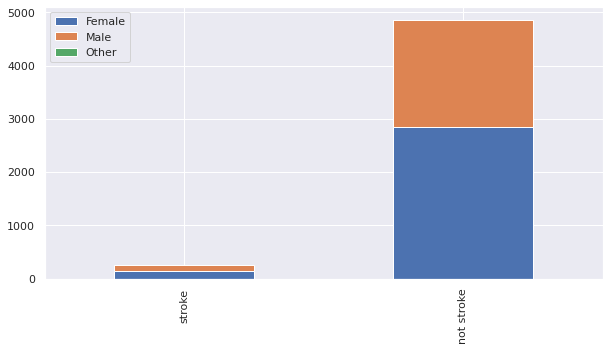

In [74]:
#plotting on gender
show_hist('gender')

Stroke Information: 
0    183
1     66
Name: hypertension, dtype: int64
Not Stroke Information: 
0    4429
1     432
Name: hypertension, dtype: int64


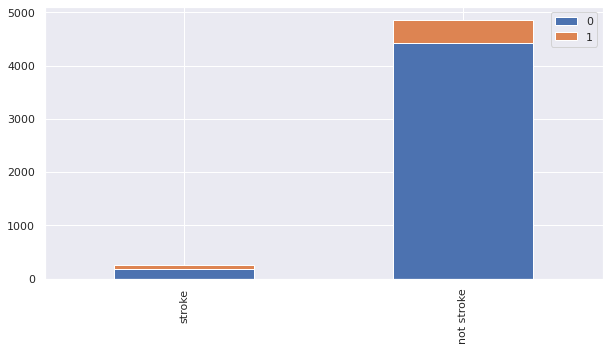

In [75]:
#plotting on hypertension
show_hist('hypertension')

Stroke Information: 
0    202
1     47
Name: heart_disease, dtype: int64
Not Stroke Information: 
0    4632
1     229
Name: heart_disease, dtype: int64


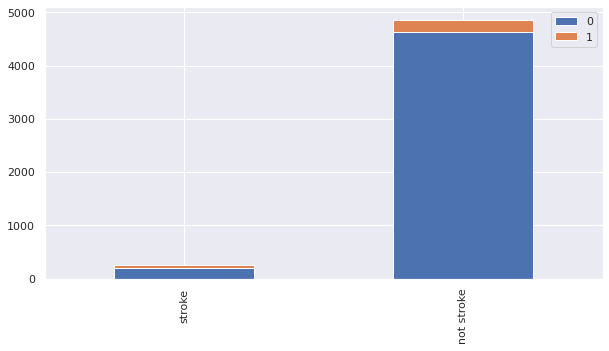

In [76]:
#plotting on heart_disease
show_hist('heart_disease')

Stroke Information: 
Yes    220
No      29
Name: ever_married, dtype: int64
Not Stroke Information: 
Yes    3133
No     1728
Name: ever_married, dtype: int64


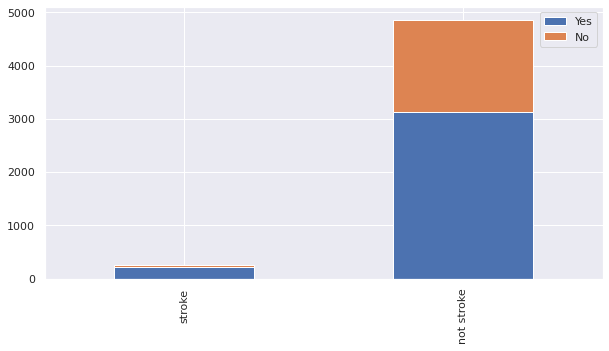

In [77]:
#plotting on ever_married
show_hist('ever_married') 

Stroke Information: 
Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64
Not Stroke Information: 
Private          2776
Self-employed     754
children          685
Govt_job          624
Never_worked       22
Name: work_type, dtype: int64


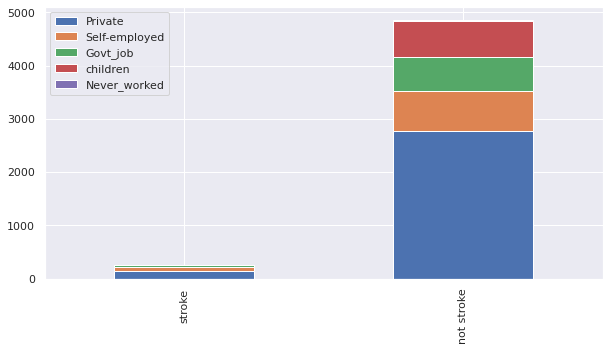

In [78]:
#plotting on work_type
show_hist('work_type')

Stroke Information: 
Urban    135
Rural    114
Name: Residence_type, dtype: int64
Not Stroke Information: 
Urban    2461
Rural    2400
Name: Residence_type, dtype: int64


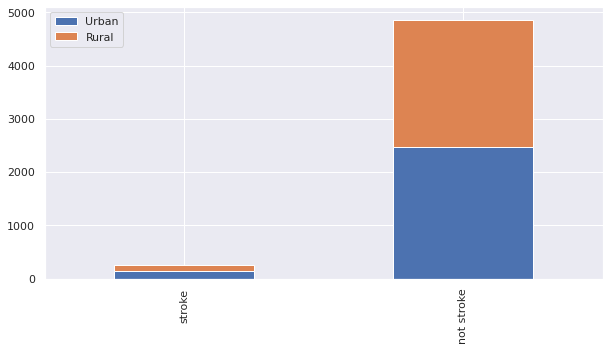

In [79]:
#plotting on Residence_type
show_hist('Residence_type')

Stroke Information: 
never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64
Not Stroke Information: 
never smoked       1802
Unknown            1497
formerly smoked     815
smokes              747
Name: smoking_status, dtype: int64


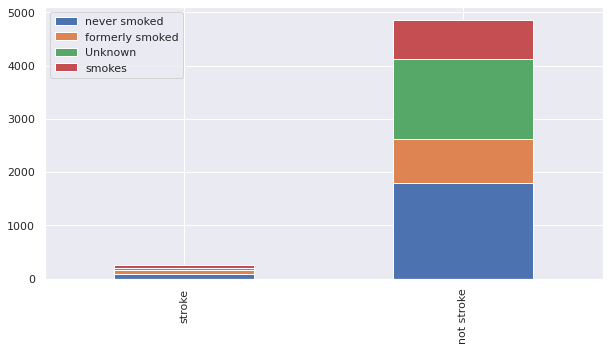

In [80]:
#plotting on smoking_status
show_hist('smoking_status')

In [81]:
#checking null values in dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [82]:
#flling null value 
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [83]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [84]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [85]:
#making a copy of main dataset
modified_dataset = [df]

In [86]:
# #making 5 classes in age data
# for dataset in modified_dataset:
#     dataset.loc[ dataset['age'] <= 16, 'age'] = 0,
#     dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 26), 'age'] = 1,
#     dataset.loc[(dataset['age'] > 26) & (dataset['age'] <= 36), 'age'] = 2,
#     dataset.loc[(dataset['age'] > 36) & (dataset['age'] <= 62), 'age'] = 3,
#     dataset.loc[ dataset['age'] > 62, 'age'] = 4

In [87]:
# #plotting histogram on age data
# show_hist('age')

In [88]:
#mapping ever_married data in two class
ever_married_map = {"Yes":1,"No":0}
for dataset in modified_dataset:
    dataset['ever_married'] = dataset['ever_married'].map(ever_married_map)

In [89]:
#mapping gender
gender_map = {"Male":1,"Female":0}
for dataset in modified_dataset:
    dataset['gender'] = dataset['gender'].map(gender_map)

In [90]:
#mapping work_type
work_type_map={"Private":1,"Self-employed":2,"Govt_job":3,"children":4,"Never_worked":5}
for dataset in modified_dataset:
    dataset['work_type'] = dataset['work_type'].map(work_type_map)

In [91]:
#mapping residence_type
res_type_map = {"Urban":0,"Rural":1}
for dataset in modified_dataset:
    dataset['Residence_type'] = dataset['Residence_type'].map(res_type_map)

In [92]:
#checking info about Residence_type data
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [93]:
# #mapping avg_glucose_level data
# for dataset in modified_dataset:
#     dataset.loc[ dataset['avg_glucose_level'] <= 77.5, 'avg_glucose_level'] = 1,
#     dataset.loc[(dataset['avg_glucose_level'] > 77.5) & (dataset['avg_glucose_level'] <= 92), 'avg_glucose_level'] = 2,
#     dataset.loc[(dataset['avg_glucose_level'] > 92) & (dataset['avg_glucose_level'] <= 114.5), 'avg_glucose_level'] = 3,
#     dataset.loc[ dataset['avg_glucose_level'] > 114.5, 'avg_glucose_level'] = 4

In [94]:
# #plotting histogram on avg_glucose_level data
# show_hist('avg_glucose_level')

In [95]:
# #mapping bmi data
# for dataset in modified_dataset:
#     dataset.loc[ dataset['bmi'] <= 18.5, 'bmi'] = 1,
#     dataset.loc[(dataset['bmi'] > 18.5) & (dataset['bmi'] <= 24.9), 'bmi'] = 2,
#     dataset.loc[(dataset['bmi'] > 24.9) & (dataset['bmi'] <= 29.9), 'bmi'] = 3,
#     dataset.loc[ dataset['bmi'] > 29.9, 'bmi'] = 4

In [96]:
# #plotting using bmi data
# show_hist('bmi')

In [97]:
#mapping smoking status data
smoke_map = {"never smoked":1,"formerly smoked":2,"Unknown":3,"smokes":4}
for dataset in modified_dataset:
    dataset['smoking_status'] = dataset['smoking_status'].map(smoke_map)

Stroke Information: 
1    90
2    70
3    47
4    42
Name: smoking_status, dtype: int64
Not Stroke Information: 
1    1802
3    1497
2     815
4     747
Name: smoking_status, dtype: int64


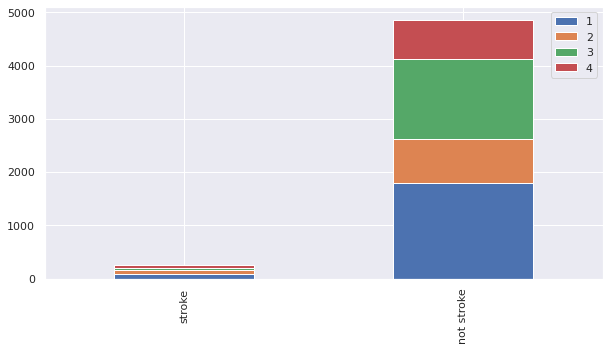

In [98]:
show_hist('smoking_status')

In [99]:
#convert float64 to float32

df['gender'] = np.float32(df['gender'])
df['age'] = np.float32(df['age'])
df['avg_glucose_level'] = np.float32(df['avg_glucose_level'])
df['bmi'] = np.float32(df['bmi'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5109 non-null   float32
 2   age                5110 non-null   float32
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                5110 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(4), int64(8)
memory usage: 399.3 KB


In [100]:
#checking null value
df.isnull().sum()

id                   0
gender               1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [101]:
#Drop null value
df.dropna(inplace=True)

In [102]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   float32
 2   age                5109 non-null   float32
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float32
 9   bmi                5109 non-null   float32
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float32(4), int64(8)
memory usage: 439.1 KB


In [104]:
#seperating features and target

X = df.drop(['id','stroke'],axis=1)
y = df['stroke']

In [105]:
X.shape,y.shape

((5109, 10), (5109,))

In [106]:
#importing library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=.2)
x_train.shape,y_train.shape

((4087, 10), (4087,))

In [128]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [129]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=10)
print(score)

[0.91585127 0.91780822 0.90802348 0.90998043 0.89823875 0.90802348
 0.91976517 0.91976517 0.8962818  0.91568627]


In [130]:
# DecisionTree Forest Score
round(np.mean(score)*100, 2)

91.09

In [131]:
clf = RandomForestClassifier()
score = cross_val_score(clf, X, y, cv=10)
print(score)

[0.94911937 0.94911937 0.94911937 0.95107632 0.94324853 0.95107632
 0.94911937 0.95107632 0.95107632 0.95098039]


In [132]:
# Random Forest Score
round(np.mean(score)*100, 2)

94.95

In [133]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)

In [114]:
#import library for accuracy checking
from sklearn.metrics import accuracy_score

In [135]:
#print accuracy
accuracy_score(y_test, prediction)*100

95.2054794520548